# Stock Market Data Visualization Notebook
## Using Matplotlib

### Introduction

This notebook analyzes stock market data to create different types of visualizations using Matplotlib. The visualizations include line plots, bar plots, pie charts, area plots, scatter plots, histograms, and box plots to gain insights into stock price movements and trading volumes.

### Data Loading and Preparation


First, we import the necessary libraries and load our stock market data from a CSV file. We also convert the date column to the proper datetime format

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the stock market data
df = pd.read_csv("stocks.csv")
df['Date'] = pd.to_datetime(df['Date'])

### Creating Folder Structure

We create a folder structure to organize our visualizations by plot type. This helps keep our output organized and easy to navigate.



In [3]:
# Creation of main folder and subfolders for different plot types
mainFolder = "matplotlib_outputs"
plotTypes = ["line_plots", "bar_plots", "pie_charts", "area_plots", "scatter_plots", "histograms", "box_plots"]
folders = {}
for type in plotTypes:
    folderPath = os.path.join(mainFolder, type)
    os.makedirs(folderPath, exist_ok=True)
    folders[type] = folderPath

# Get unique company tickers
Tickers = df['Ticker'].unique()

## Plotting

### Line Plots: Price and Volume Trends Over Time

Line plots are excellent for visualizing how stock metrics change over time. We create line plots for each numeric column (Open, High, Low, Close, Adjusted Close, and Volume) to compare different companies.

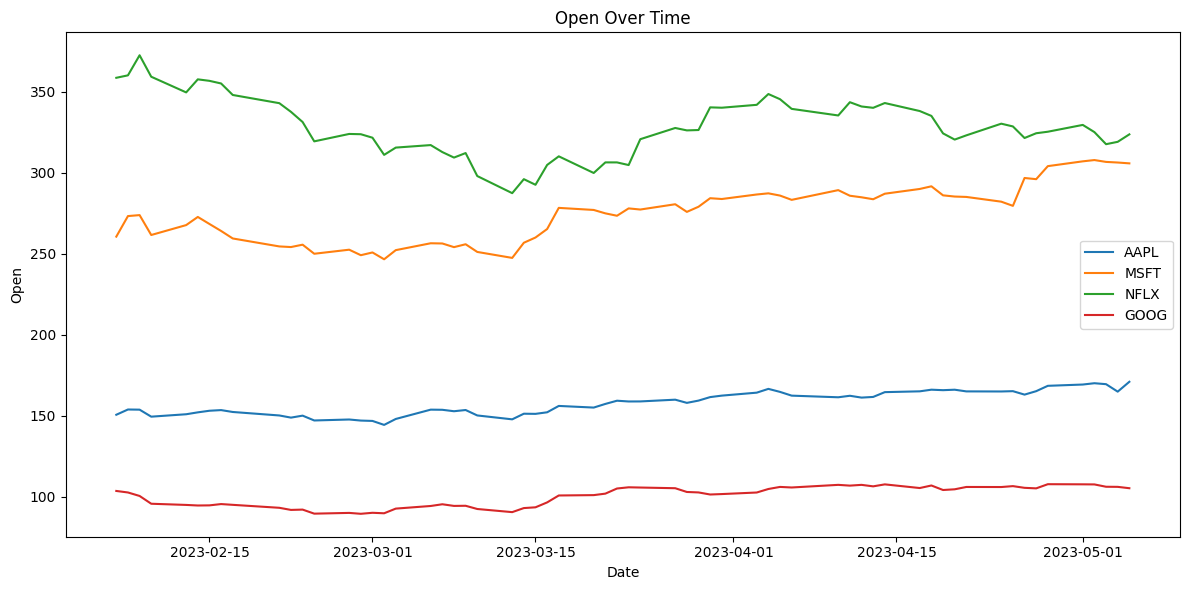

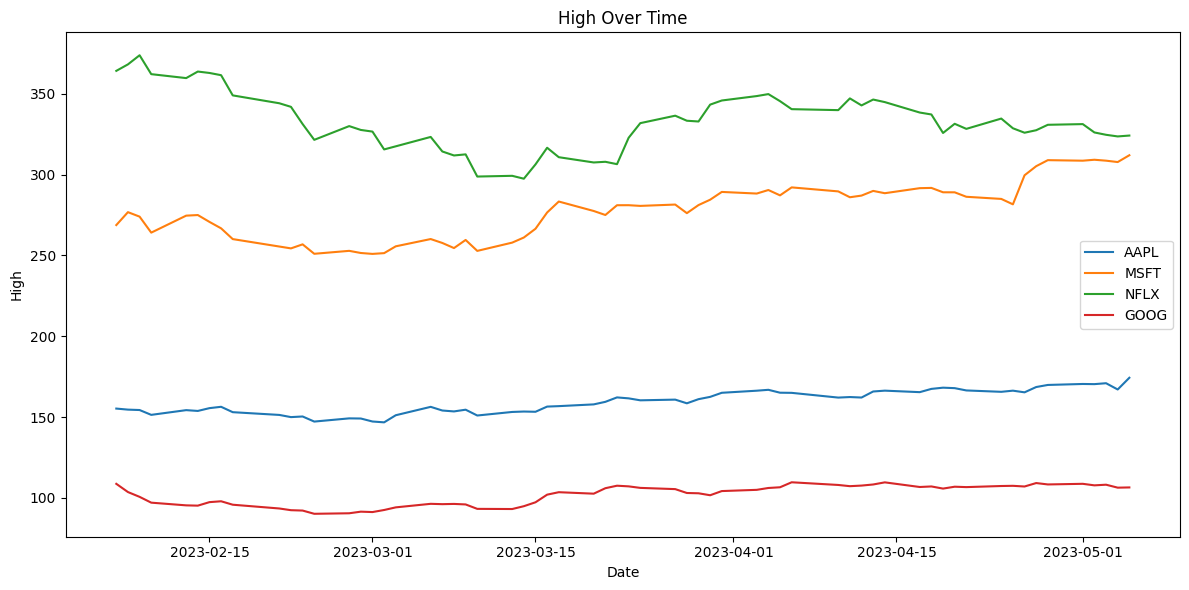

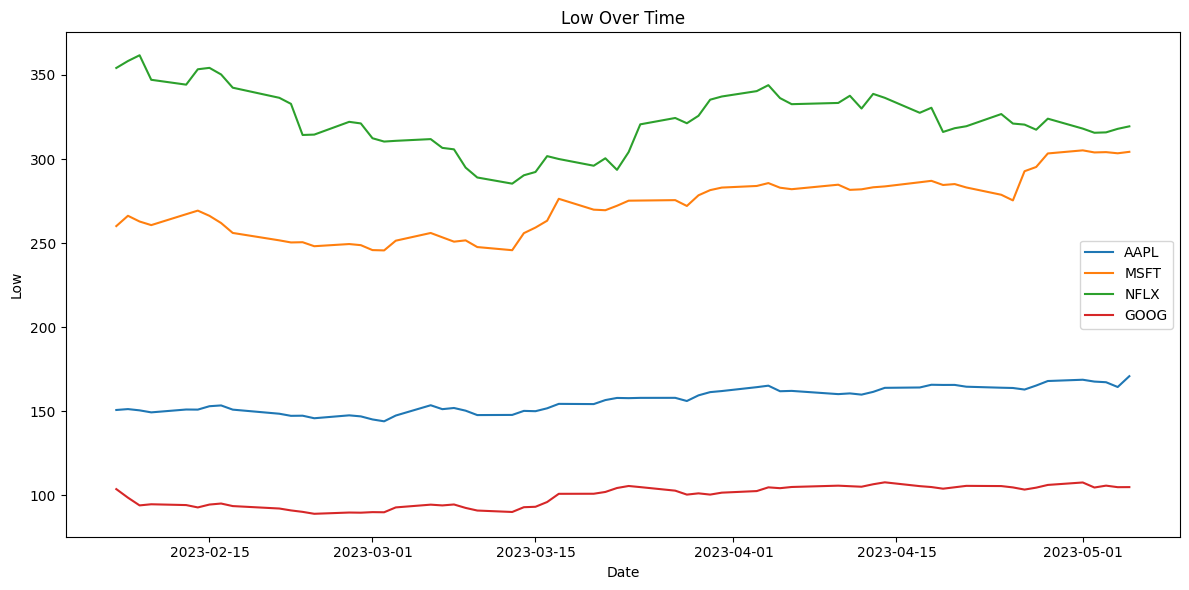

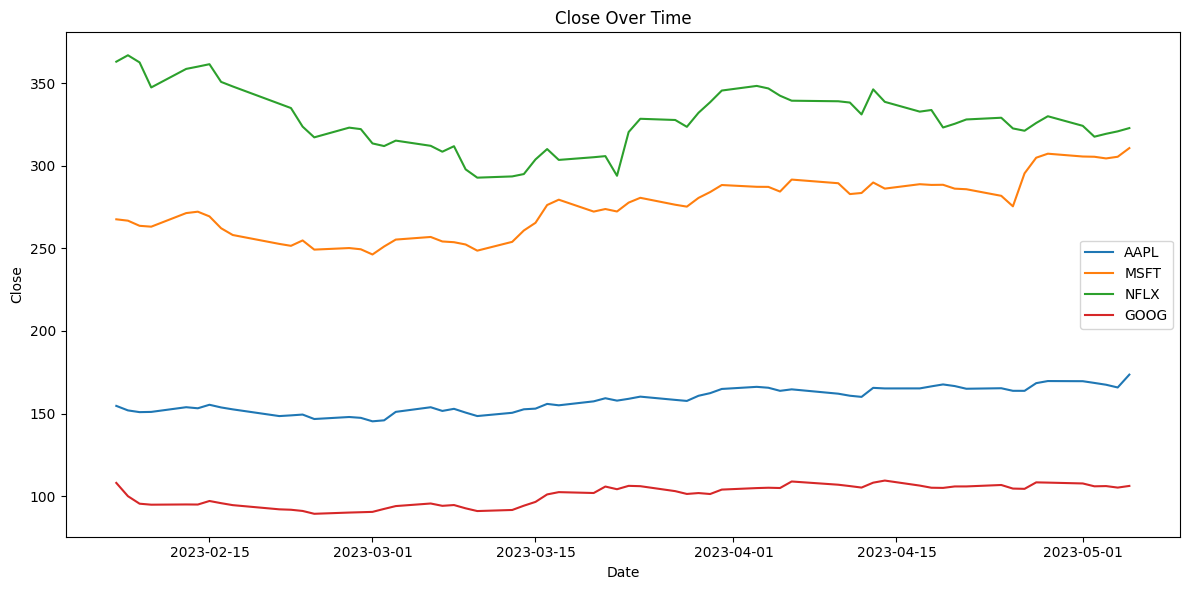

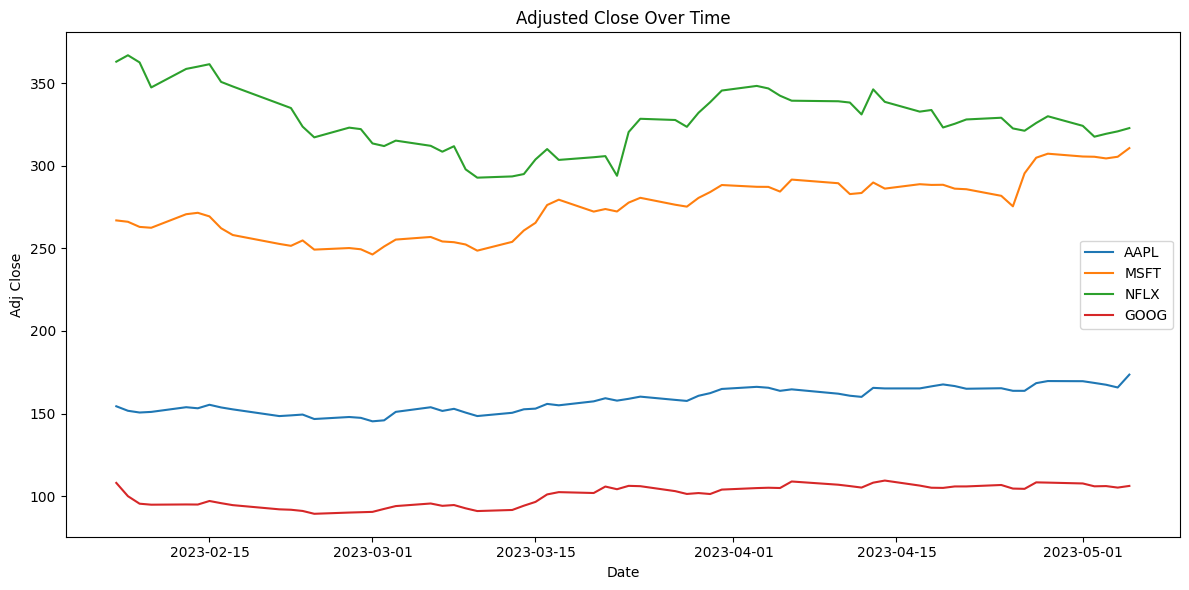

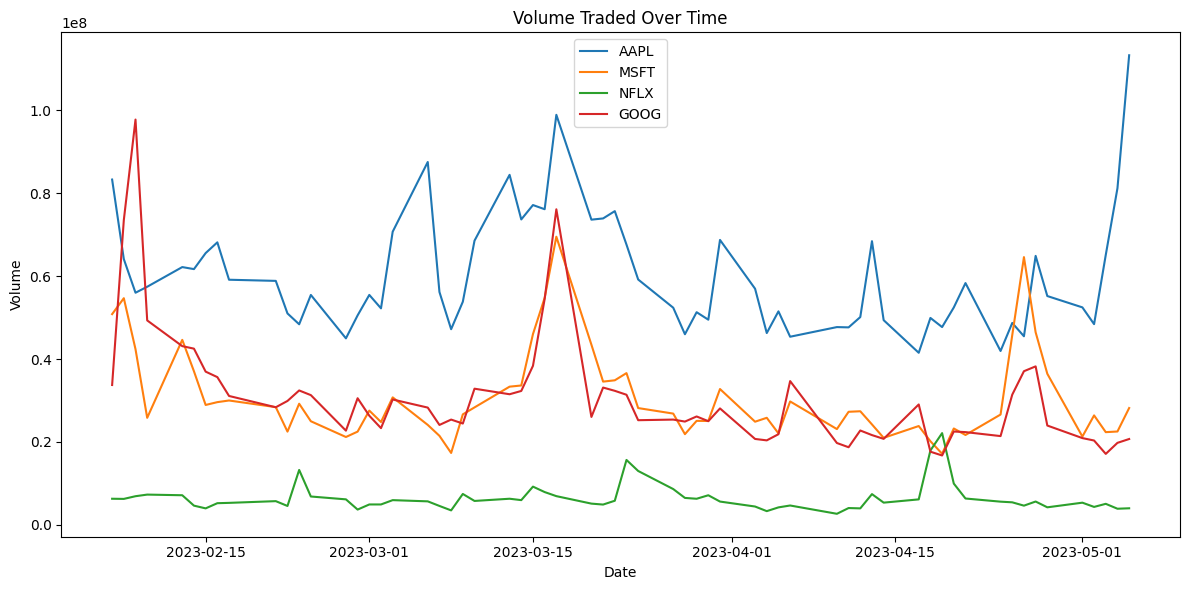

In [4]:
# Line Plots for intercompany comparison
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in columns:
    plt.figure(figsize=(12, 6))
    for ticker in Tickers:
        company = df[df['Ticker'] == ticker]
        plt.plot(company['Date'], company[col], label=ticker)
    title = f"{col} Over Time" if col not in ['Adj Close', 'Volume'] else (
        "Adjusted Close Over Time" if col == 'Adj Close' else "Volume Traded Over Time")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{folders['line_plots']}/{col}_LinePlot.png")
    plt.show()

### Bar Plot: Highest Closing Prices by Company

Bar plots are useful for comparing values across categories. Here we compare the highest closing price reached by each company in our dataset.

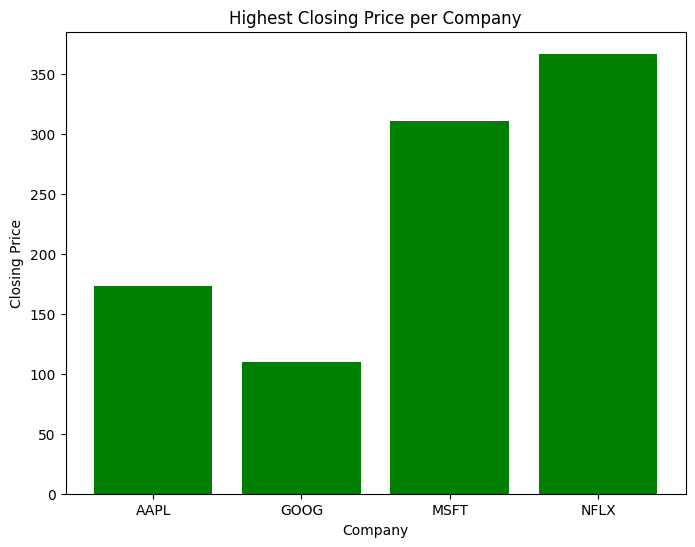

In [5]:
# Bar Plot: Highest Closing Price per Company
highestClosing = df.groupby('Ticker')['Close'].max().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(highestClosing['Ticker'], highestClosing['Close'], color='green')
plt.title('Highest Closing Price per Company')
plt.xlabel('Company')
plt.ylabel('Closing Price')
plt.savefig(f"{folders['bar_plots']}/Bar_Highest_Closing_Price.png")
plt.show()

### Pie Chart: Trading Volume Distribution

Pie charts show the proportion of each category as part of a whole. This visualization shows how the total trading volume is distributed among different companies.

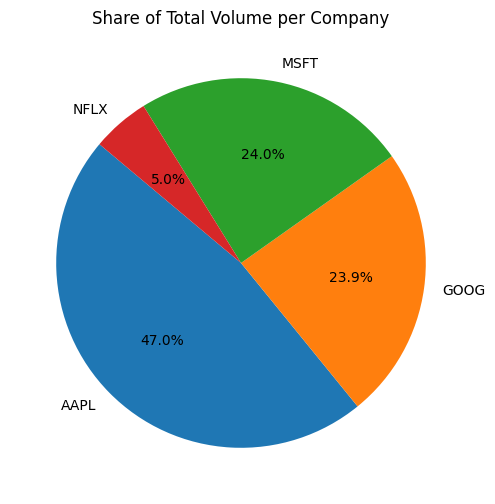

In [6]:
# Pie Chart: Total Volume per Company
totalVolume = df.groupby('Ticker')['Volume'].sum()
plt.figure(figsize=(8, 6))
plt.pie(totalVolume, labels=totalVolume.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Total Volume per Company')
plt.savefig(f"{folders['pie_charts']}/Pie_Total_Volume.png")
plt.show()

### Area Plot: Cumulative Close Prices

Area plots are great for showing how values accumulate over time. This visualization displays how closing prices accumulate over the time period for each company.

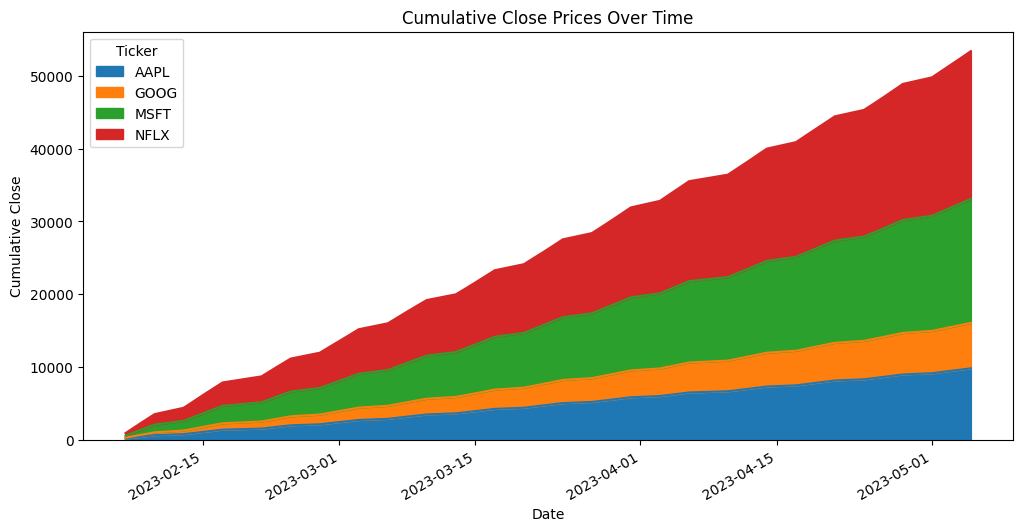

In [7]:
# Area Plot: Cumulative Close Price 
cumulativeClose = df.groupby(['Date', 'Ticker'])['Close'].sum().unstack()
cumulativeClose.fillna(0, inplace=True)
cumulativeClose = cumulativeClose.cumsum()
plt.figure(figsize=(12, 6))
cumulativeClose.plot.area(ax=plt.gca())
plt.title('Cumulative Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Close')
plt.savefig(f"{folders['area_plots']}/Area_Cumulative_Close.png")
plt.show()

### Scatter Plots: Open vs. Close Price Correlation

Scatter plots help visualize relationships between two variables. For each company, we create a scatter plot to examine the relationship between opening and closing prices.

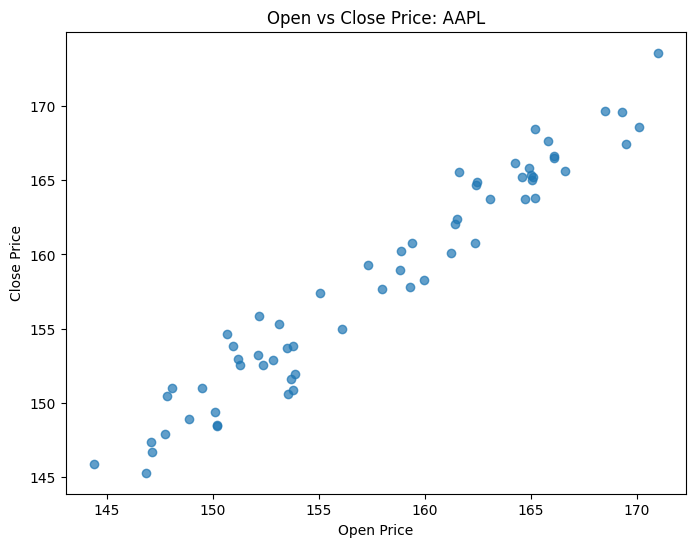

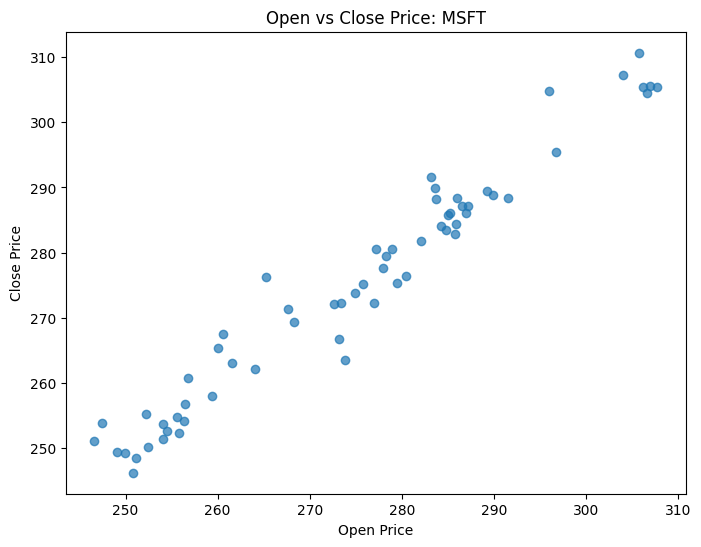

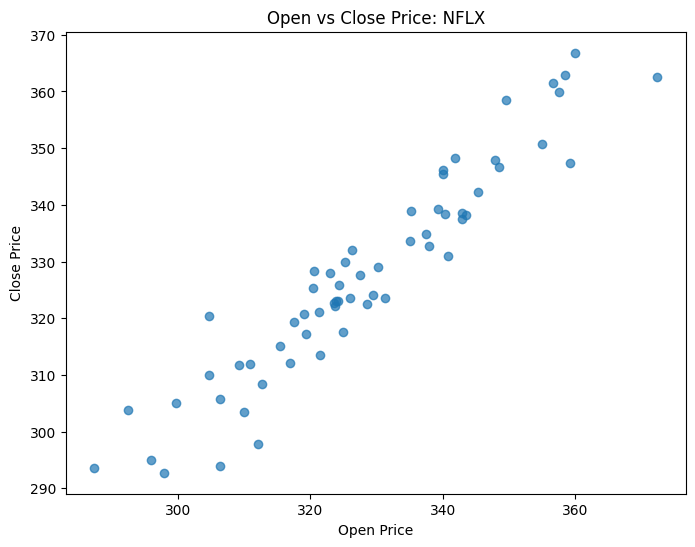

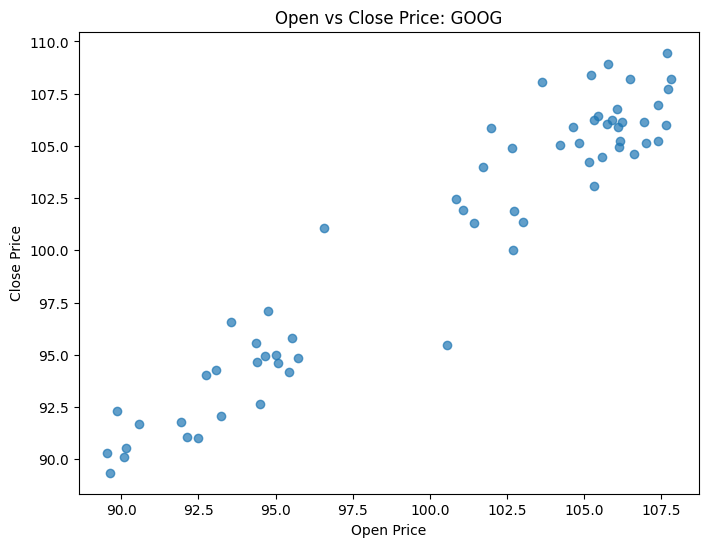

In [8]:
# Scatter: Open vs Close for Each Company
for ticker in Tickers:
    cmp_df = df[df['Ticker'] == ticker]
    plt.figure(figsize=(8, 6))
    plt.scatter(cmp_df['Open'], cmp_df['Close'], alpha=0.7)
    plt.title(f"Open vs Close Price: {ticker}")
    plt.xlabel("Open Price")
    plt.ylabel("Close Price")
    plt.savefig(f"{folders['scatter_plots']}/Scatter_{ticker}_OpenVsClose.png")
    plt.show()

### Histogram: Volume Distribution Analysis

Histograms show the distribution of a dataset. This visualization shows how trading volumes are distributed for each company, allowing us to see common volume levels and outliers.



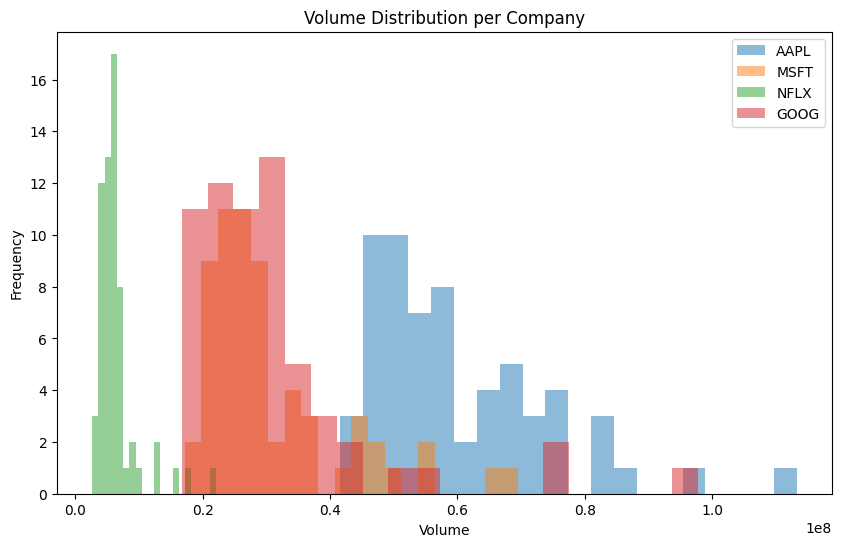

In [9]:
# Histogram: Distribution of Volume
plt.figure(figsize=(10, 6))
for ticker in Tickers:
    cmp_df = df[df['Ticker'] == ticker]
    plt.hist(cmp_df['Volume'], bins=20, alpha=0.5, label=ticker)
plt.title("Volume Distribution per Company")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(f"{folders['histograms']}/Histogram_Volume_Distribution.png")
plt.show()

### Box Plots: Price and Volume Distribution Statistics

Box plots provide a statistical summary of data distribution, showing median, quartiles, and outliers. We create box plots for each numeric column to compare distributions across companies

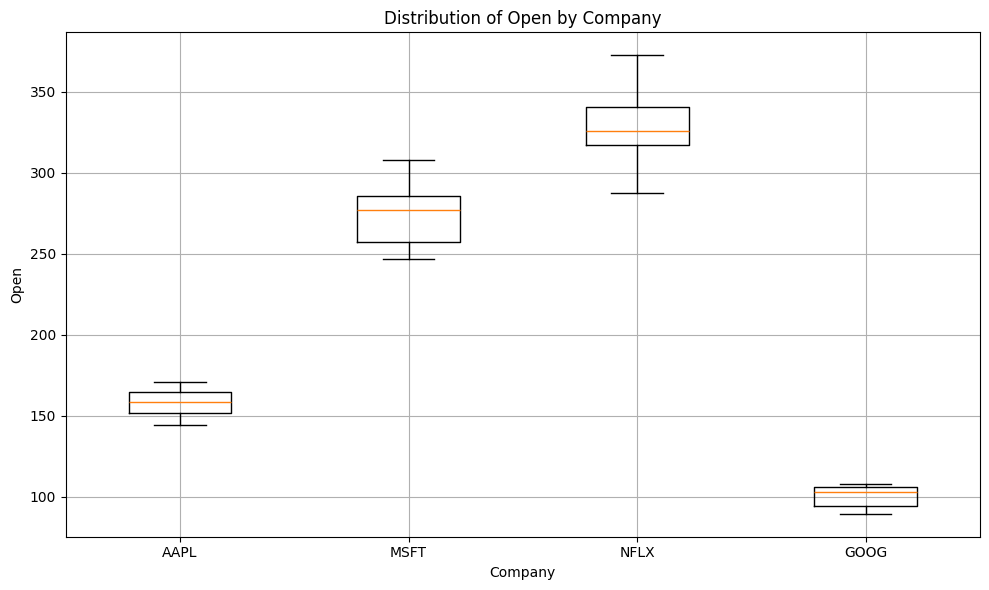

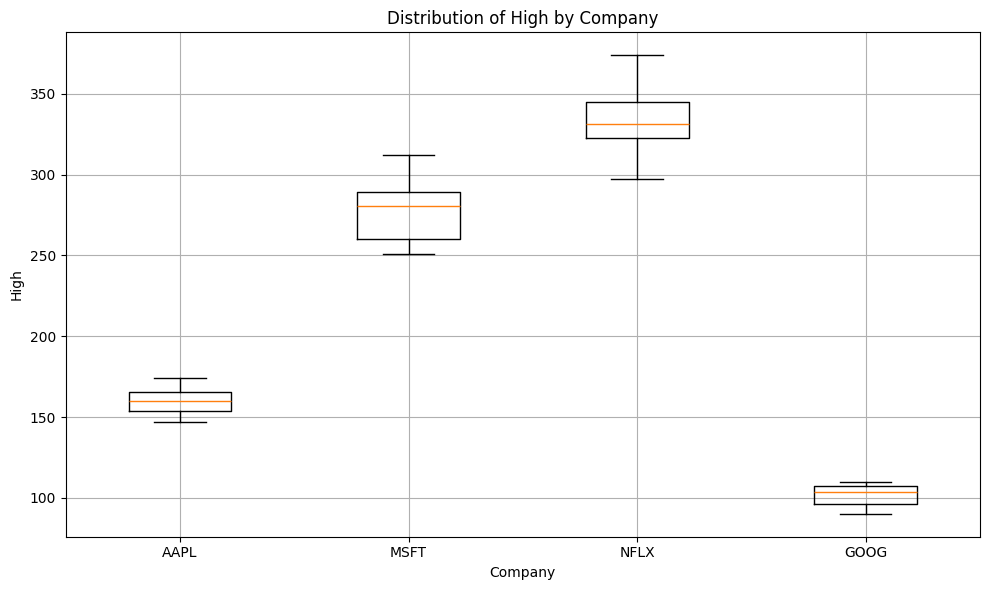

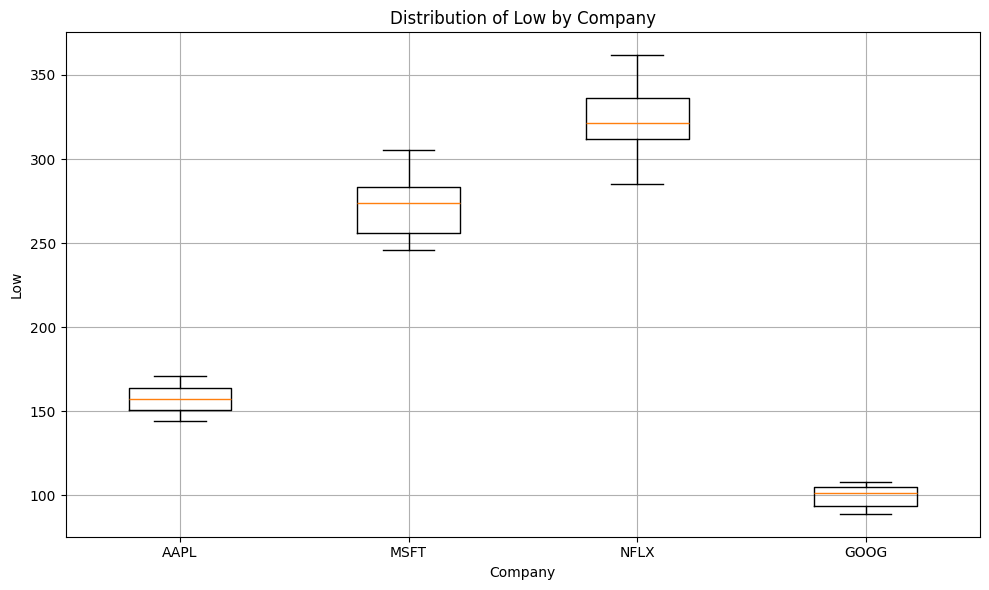

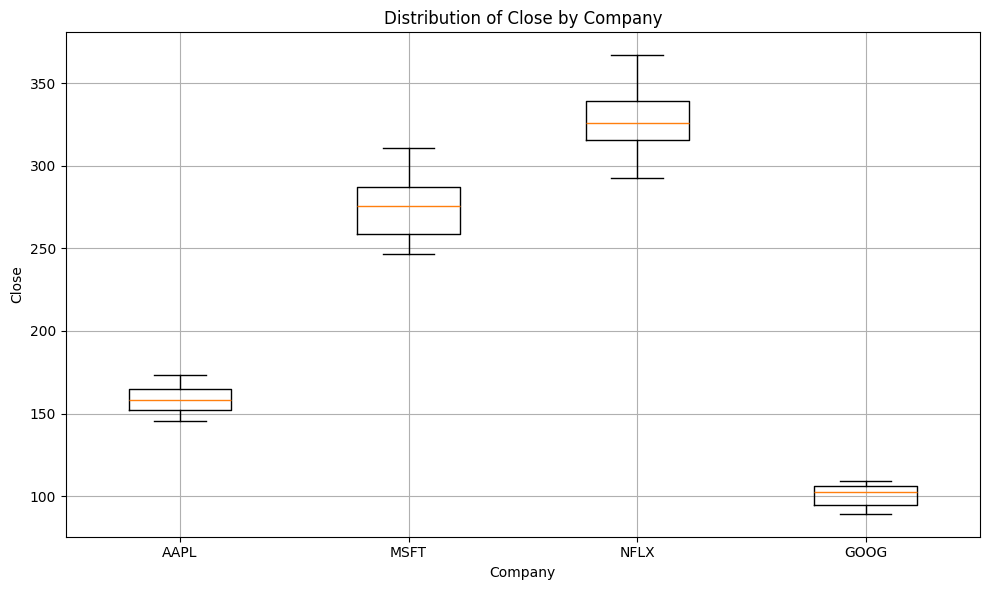

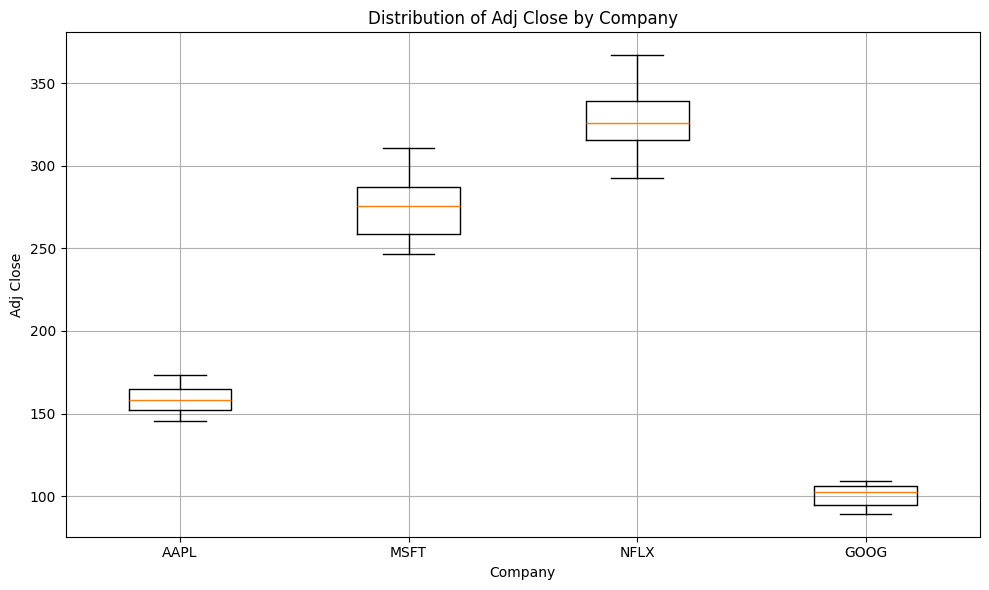

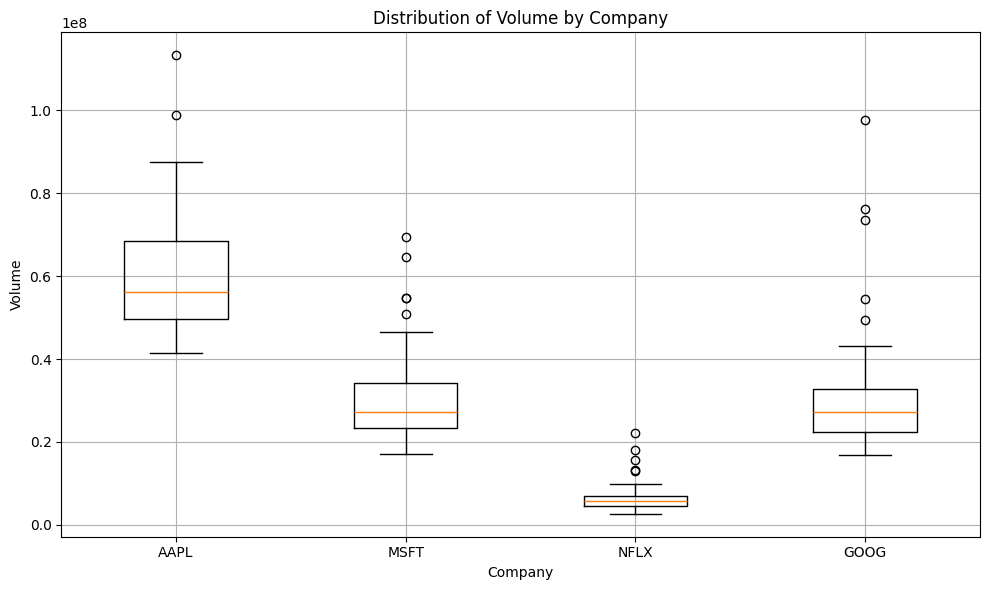

In [10]:
# Box Plots
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    plt.figure(figsize=(10, 6))
    data_by_company = [df[df['Ticker'] == ticker][col] for ticker in Tickers]
    plt.boxplot(data_by_company, tick_labels=Tickers)
    plt.title(f"Distribution of {col} by Company")
    plt.xlabel("Company")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{folders['box_plots']}/BoxPlot_{col}.png")
    plt.show()

## Conclusion

In this notebook, we've created various visualizations to analyze stock market data. These visualizations provide different perspectives on price movements, trading volumes, and relationships between different metrics across companies. The combination of these visualizations gives a comprehensive view of the market behavior during the analyzed period.